# A Guide to Time Series Forecasting in Python

Time series forecasting is a useful data science technique with applications in a wide range of industries and fields. Here’s a guide to getting started with the basic concepts behind it.

Time series forecasting is the task of predicting future values based on historical data. Examples across industries include forecasting of weather, sales numbers and stock prices. More recently, it has been applied to predicting price trends for cryptocurrencies such as Bitcoin and Ethereum. Given the prevalence of time series forecasting applications in many different fields, every data scientist should have some knowledge of the available methods for carrying it out.

A wide array of methods are available for time series forecasting. One of the most commonly used is Autoregressive Moving Average (ARMA), which is a statistical model that predicts future values using past values. This method for making time series predictions is flawed, however, because it doesn’t capture seasonal trends. It also assumes that the time series data is stationary, meaning that its statistical properties wouldn’t change over time. This type of behavior is an idealized assumption that doesn’t hold in practice, however, which means ARMA may provide skewed results. 

An extension of ARMA is the Autoregressive Integrated Moving Average (ARIMA) model, which doesn’t assume stationarity but does still assume that the data exhibits little to no seasonality. Fortunately, the seasonal ARIMA (SARIMA) variant is a statistical model that can work with non-stationary data and capture some seasonality. Additional popular time series forecasting packages are Prophet and DeepAR. Prophet is an additive model developed by Facebook where non-linear trends are fit to seasonality effects such as daily, weekly, yearly and holiday trends. DeepAR is a package developed by Amazon that enables time series forecasting with recurrent neural networks. 

Python provides many easy-to-use libraries and tools for performing time series forecasting in Python. Specifically, the stats library in Python has tools for building ARMA models, ARIMA models and SARIMA models with just a few lines of code. Since all of these models are available in a single library, you can easily run many Python forecasting experiments using different models in the same script or notebook when conducting time series forecasting in Python. 

Here, we will look at examples of time series forecasting and how to build ARMA, ARIMA and SARIMA models to make a time series prediction on the future prices of Bitcoin (BTC).

# Reading and Displaying BTC Time Series Data

We will start by reading in the historical prices for BTC using the Pandas data reader. Let’s install it using a simple pip command in terminal:

In [2]:
# pip install pandas-datareader

Let’s open up a Python script and import the data-reader from the Pandas library:

In [3]:
import pandas_datareader.data as web
import datetime

Let’s also import the Pandas library itself and relax the display limits on columns and rows:

In [4]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

We can now import the date-time library, which will allow us to define start and end dates for our data pull:

In [5]:
import datetime

Now we have everything we need to pull Bitcoin price time series data, let’s collect data.

In [47]:
import pandas_datareader as web 

diar_data = df = pd.read_csv("Diarrhea data  2018 - 2022.csv",parse_dates=["Month"])

print(diar_data.head())

       Month  Rorya_DC  Tarime_DC  Kyerwa_DC  Missenyi_DC  Ukerewe_DC  \
0 2018-01-28       603        647       1459          920        2366   
1 2018-02-28      1017        741       1301          888        2373   
2 2018-03-28       825        565       1193         1002        1591   
3 2018-04-28       833        524       1425          800        1828   
4 2018-05-28      1113        650       1108          840        2057   

   Magu_DC  Buhigwe_DC  Kibondo_DC  Nkasi_DC  Nsimbo_DC  Tanganyika_DC  \
0     1755         898        3644      1379        544            313   
1     2245         864        4806      1729        761            341   
2     1945         858        3486      1062        590            340   
3     1587        1275        4018      1493        625            355   
4     1579         991        4462      1450        687            464   

   Mpanda_MC  Sumbawanga_DC  Momba_DC  Tunduma_TC  Kyela_DC  Nyasa_DC  \
0        278           1972       712      

In [48]:
type(diar_data['Month'])

pandas.core.series.Series

In [49]:
diar_data.index = pd.to_datetime(diar_data['Month'], format='%Y-%m-%d')

In [52]:
del diar_data['Month']

In [53]:
diar_data

,Rorya_DC,Tarime_DC,Kyerwa_DC,Missenyi_DC,Ukerewe_DC,Magu_DC,Buhigwe_DC,Kibondo_DC,Nkasi_DC,Nsimbo_DC,Tanganyika_DC,Mpanda_MC,Sumbawanga_DC,Momba_DC,Tunduma_TC,Kyela_DC,Nyasa_DC,Tunduru_DC,Ludewa_DC,Makambako_TC,Masasi_DC,Mtwara_DC
Month,,,,,,,,,,,,,,,,,,,,,,
2018-01-28,603,647,1459,920,2366,1755,898,3644,1379,544,313,278,1972,712,398,778,367,1630,665,1150,1472,433
2018-02-28,1017,741,1301,888,2373,2245,864,4806,1729,761,341,291,1605,1169,581,924,505,1374,682,534,1235,336
2018-03-28,825,565,1193,1002,1591,1945,858,3486,1062,590,340,328,1666,1053,468,937,312,1108,606,1532,999,312
2018-04-28,833,524,1425,800,1828,1587,1275,4018,1493,625,355,466,1698,1017,374,830,264,1051,590,1537,801,290
2018-05-28,1113,650,1108,840,2057,1579,991,4462,1450,687,464,288,2676,1399,331,982,267,907,579,1761,874,337
2018-06-28,1038,493,1336,794,1331,1257,1125,3936,1474,460,499,344,1768,1249,420,870,189,929,353,408,893,251
2018-07-28,153,601,1029,812,1639,1639,1160,4727,3062,515,756,584,1826,1606,285,789,225,1183,337,225,1217,236
2018-08-28,1168,697,1120,824,1500,2037,1104,5319,1743,959,1027,545,1445,1589,366,1014,324,1948,460,245,1195,377
2018-09-28,998,556,777,887,1279,1752,994,4501,1666,752,832,647,1657,1572,415,1151,453,1902,545,218,958,415


Let’s plot our time series data. To do this, let’s import the data visualization libraries Seaborn and Matplotlib:

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

Let’s format our visualization using Seaborn:

In [55]:
sns.set()

And label the y-axis and x-axis using Matplotlib. We will also rotate the dates on the x-axis so that they’re easier to read:

And finally, generate our plot with Matplotlib:

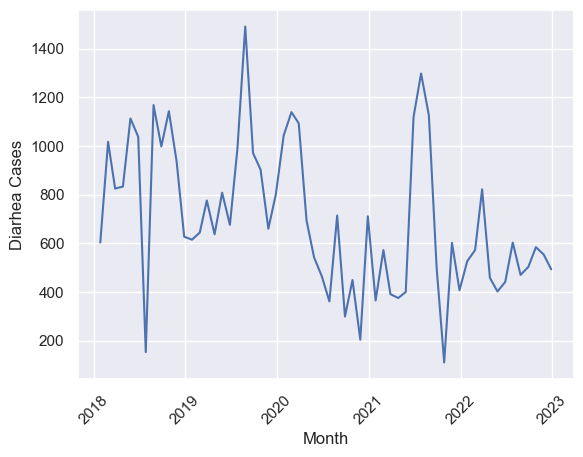

In [102]:
plt.ylabel('Diarhea Cases')
plt.xlabel('Month')
plt.xticks(rotation=45)

plt.plot(diar_data.index, diar_data['Rorya_DC'], )

### Extracting specific selected columns to new DataFrame as a copy

In [103]:
rorya_diar = diar_data['Rorya_DC']
rorya = diar_data.filter(['Rorya_DC'], axis=1)

rorya.head()

,Rorya_DC
Month,
2018-01-28,603
2018-02-28,1017
2018-03-28,825
2018-04-28,833
2018-05-28,1113


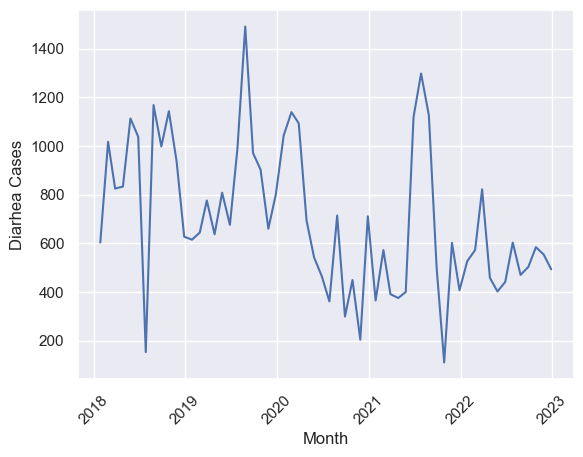

In [104]:
plt.ylabel('Diarhea Cases')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.plot(diar_data.index, rorya, )

Now we can proceed to building our first time series model, the Autoregressive Moving Average.

# Splitting Data for Training and Testing

An important part of model building is splitting our data for training and testing, which ensures that you build a model that can generalize outside of the training data and that the performance and outputs are statistically meaningful. 

We will split our data such that everything before November 2020 will serve as training data, with everything after 2020 becoming the testing data:

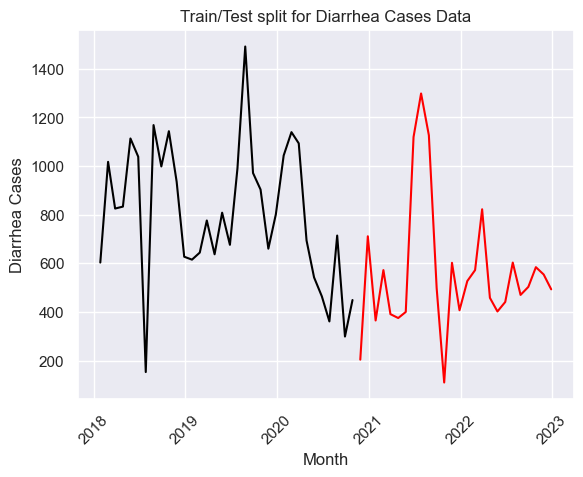

In [121]:
train = rorya[rorya.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = rorya[rorya.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Diarrhea Cases')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.title("Train/Test split for Diarrhea Cases Data")
plt.show()

# Autoregressive Moving Average (ARMA)

The term “autoregressive” in ARMA means that the model uses past values to predict future ones. Specifically, predicted values are a weighted linear combination of past values. This type of regression method is similar to linear regression, with the difference being that the feature inputs here are historical values. 

Moving average refers to the predictions being represented by a weighted, linear combination of white noise terms, where white noise is a random signal. The idea here is that ARMA uses a combination of past values and white noise in order to predict future values. Autoregression models market participant behavior like buying and selling BTC. The white noise models shock events like wars, recessions and political events. 

We can define an ARMA model using the SARIMAX package:

In [122]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Let’s define our input:

In [123]:
y = train['Rorya_DC']

In [124]:
y

Month
2018-01-28     603
2018-02-28    1017
2018-03-28     825
2018-04-28     833
2018-05-28    1113
2018-06-28    1038
2018-07-28     153
2018-08-28    1168
2018-09-28     998
2018-10-28    1143
2018-11-28     935
2018-12-28     627
2019-01-28     615
2019-02-28     644
2019-03-28     776
2019-04-28     637
2019-05-28     808
2019-06-28     676
2019-07-28     990
2019-08-28    1491
2019-09-28     971
2019-10-28     903
2019-11-28     660
2019-12-28     802
2020-01-28    1043
2020-02-28    1139
2020-03-28    1093
2020-04-28     694
2020-05-28     542
2020-06-28     464
2020-07-28     361
2020-08-28     714
2020-09-28     299
2020-10-28     449
Name: Rorya_DC, dtype: int64

And then let’s define our model. To define an ARMA model with the SARIMAX class, we pass in the order parameters of (1, 0 ,1). Alpha corresponds to the significance level of our predictions. Typically, we choose an alpha = 0.05. Here, the ARIMA algorithm calculates upper and lower bounds around the prediction such that there is a 5 percent chance that the real value will be outside of the upper and lower bounds. This means that there is a 95 percent confidence that the real value will be between the upper and lower bounds of our predictions.

In [125]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


We can then fit our model:

In [126]:
ARMAmodel = ARMAmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13279D+00    |proj g|=  7.59190D-02

At iterate    5    f=  7.11704D+00    |proj g|=  3.90827D-03

At iterate   10    f=  7.11672D+00    |proj g|=  1.51207D-03

At iterate   15    f=  7.11560D+00    |proj g|=  2.72027D-03

At iterate   20    f=  7.11351D+00    |proj g|=  8.24540D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     26      1     0     0   5.264D-06   7.114D+00
  F =   7.1135141100115726     

CONVERG

 This problem is unconstrained.


### Generate our predictions and plot the results:


/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


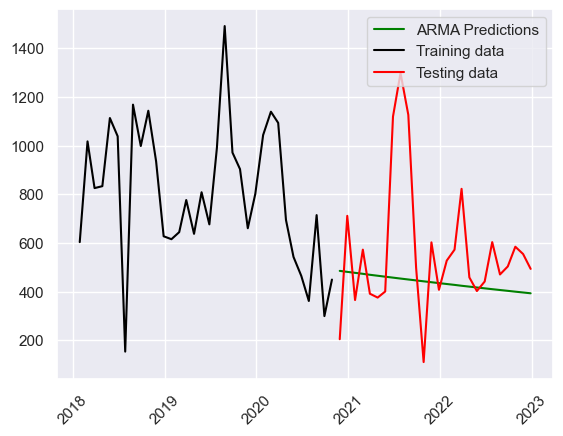

In [129]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.plot(train, color = "black", label = 'Training data')
plt.plot(test, color = "red", label = 'Testing data')
plt.xticks(rotation=45)
plt.legend()

We can also evaluate the performance using the root mean-squared error:

In [128]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Rorya_DC"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  293.14394287720637


The RMSE is pretty high, which we could have guessed upon inspecting the plot. Unfortunately, the model predicts a decrease in price when the price actually increases. Again, ARMA is limited in that it fails for non-stationary time series and does not capture seasonality. Let’s see if we can improve performance with an ARIMA model. 

# Autoregressive Integrated Moving Average (ARIMA)

Let’s import the ARIMA package from the stats library:

In [113]:
from statsmodels.tsa.arima.model import ARIMA

An ARIMA task has three parameters. The first parameter corresponds to the lagging (past values), the second corresponds to differencing (this is what makes non-stationary data stationary), and the last parameter corresponds to the white noise (for modeling shock events).

Let’s define an ARIMA model with order parameters (2,2,2):

RMSE:  374.711404643971


/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pr

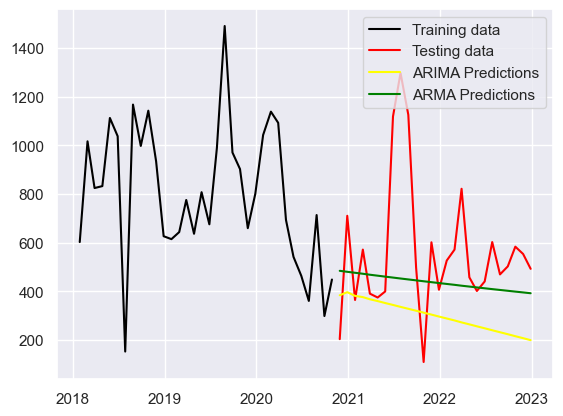

In [134]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predics"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_ou = y_pred_df["Predics"] 

plt.plot(train, color = "black", label = 'Training data')
plt.plot(test, color = "red", label = 'Testing data')
plt.plot(y_pred_ou, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Rorya_DC"].values, y_pred_df["Predics"]))
print("RMSE: ",arma_rmse)

We see that the ARIMA predictions (in yellow) fall on bottom of the ARMA predictions. Let’s try decreasing the differencing parameter to ARIMA (2,1,2):

We see this helps capture the increasing price direction. Let’s try playing with the parameters even further with ARIMA(5,4,2):

And we have an RMSE of 793, which is better than ARMA. Another approach is to train a linear regression model on temporal features such as week, month, and year. This approach is limited since it does not capture autoregressive and moving average features like the ARIMA method. Further, ARIMA trains regressors on detrended lagged target values as opposed to independent variables like linear regression. With this being said ARIMA would likely outperform a linear regression model trained on independent temporal variables. 

Finally, let’s see if SARIMA, which incorporates seasonality, will further improve performance. 

# Seasonal ARIMA (SARIMA)

Seasonal ARIMA captures historical values, shock events and seasonality. We can define a SARIMA model using the SARIMAX class:

/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28744D+00    |proj g|=  5.62288D-02

At iterate    5    f=  2.27024D+00    |proj g|=  4.79863D-03

At iterate   10    f=  2.26994D+00    |proj g|=  4.13896D-04

At iterate   15    f=  2.26992D+00    |proj g|=  1.81699D-04

At iterate   20    f=  2.26987D+00    |proj g|=  2.60898D-03

At iterate   25    f=  2.26663D+00    |proj g|=  1.21655D-02

At iterate   30    f=  2.25192D+00    |proj g|=  5.33042D-03

At iterate   35    f=  2.24880D+00    |proj g|=  2.69249D-03

At iterate   40    f=  2.24788D+00    |proj g|=  2.29411D-03

At iterate   45    f=  2.24767D+00    |proj g|=  2.29809D-03

At iterate   50    f=  2.24667D+00    |proj g|=  1.29151D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/kim/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


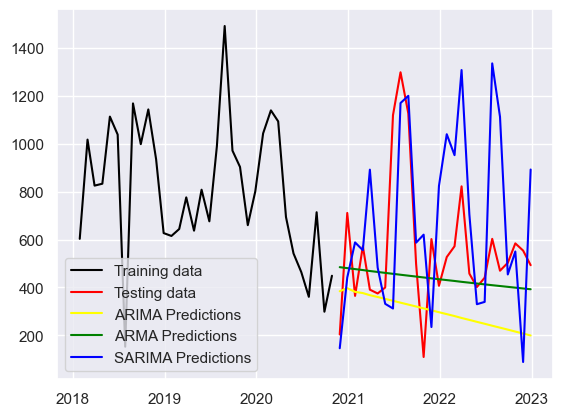

In [135]:
SARIMAXmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predict"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_o = y_pred_df["Predict"] 

plt.plot(train, color = "black", label = 'Training data')
plt.plot(test, color = "red", label = 'Testing data')
plt.plot(y_pred_ou, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_o, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

In [136]:

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Rorya_DC"].values, y_pred_df["Predict"]))
print("RMSE: ",arma_rmse)

RMSE:  376.65726137263584


Here we have an RMSE of 377, which is slightly worse than ARIMA. This may be due to lack of hyperparameter tuning. If we play around with the parameters for our SARIMA model we should be able to improve performance even further. 

I encourage you to experiment with the hyperparameters to see if you can build a SARIMA model that outperforms ARIMA. Further, you can employ methods like grid search to algorithmically find the best parameters for each model. 

# Incorporate Time Series Forecasting

Time series forecasting is a common task that many data science teams face across industries. Having sound knowledge of common tools, methods and use cases of time series forecasting will enable data scientists to quickly run new experiments and generate results. Understanding the significance of the parameters in each of these models, such as the lag parameter, differencing, white noise and seasonality, can lay the foundation for building simple time series models. This also provides a good foundation for understanding some of the more advanced techniques available like Python forecasting and building an ARIMA model in Python. 

Being able to forecast future events accurately and reliably is a valuable skill that has applications outside of cryptocurrency and traditional financial markets. With that said, any data scientist, regardless of the industry they work in, should be familiar with the basics. Python provides libraries that make it easy for data scientist beginners to get started learning how to implement time series forecasting models when carrying out time series forecasting in Python. 